In [31]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

import seaborn as sns

from datetime import datetime, timedelta

In [32]:
building5 = pd.read_csv('building5.csv')

In [33]:
building5['timestamp'] = pd.to_datetime(building5['timestamp'])

In [34]:
assert(building5['building_number'].unique() == [5])

In [35]:
building5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26400 entries, 0 to 26399
Data columns (total 5 columns):
timestamp          26400 non-null datetime64[ns]
main_meter         26400 non-null float64
sub_meter_1        26400 non-null float64
sub_meter_2        26400 non-null float64
building_number    26400 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.0 MB


In [36]:
building5.head()

,timestamp,main_meter,sub_meter_1,sub_meter_2,building_number
0,2017-04-01 00:00:00,2556.829655,1479.085721,0.000000,5
1,2017-04-01 00:15:00,2121.676884,1163.737726,0.000000,5
2,2017-04-01 00:30:00,2284.942103,1315.318128,7.692785,5
3,2017-04-01 00:45:00,2212.829422,1284.544122,0.000000,5
4,2017-04-01 01:00:00,2239.200211,1270.958430,0.000000,5


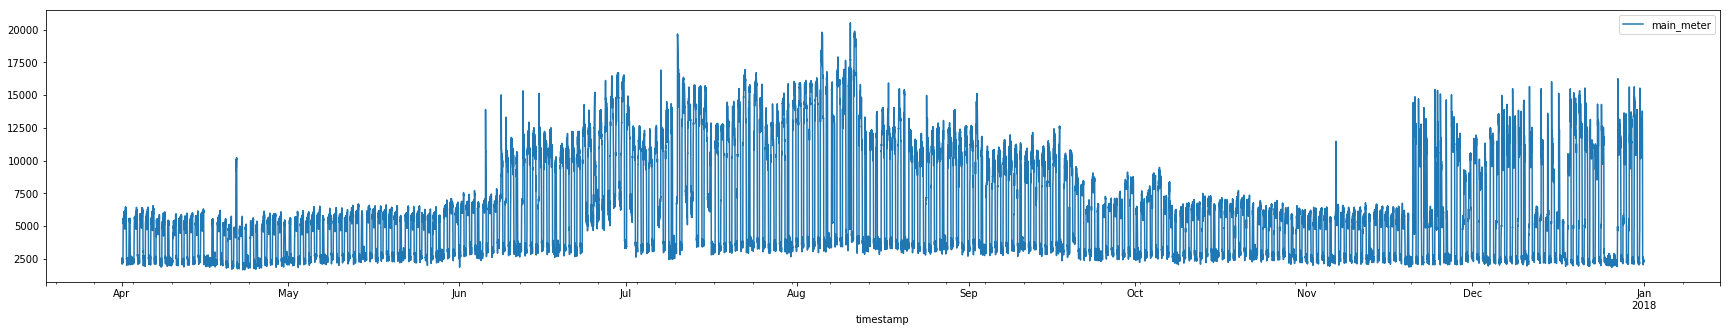

In [37]:
building5.plot(x='timestamp', y='main_meter', figsize=(30, 5))

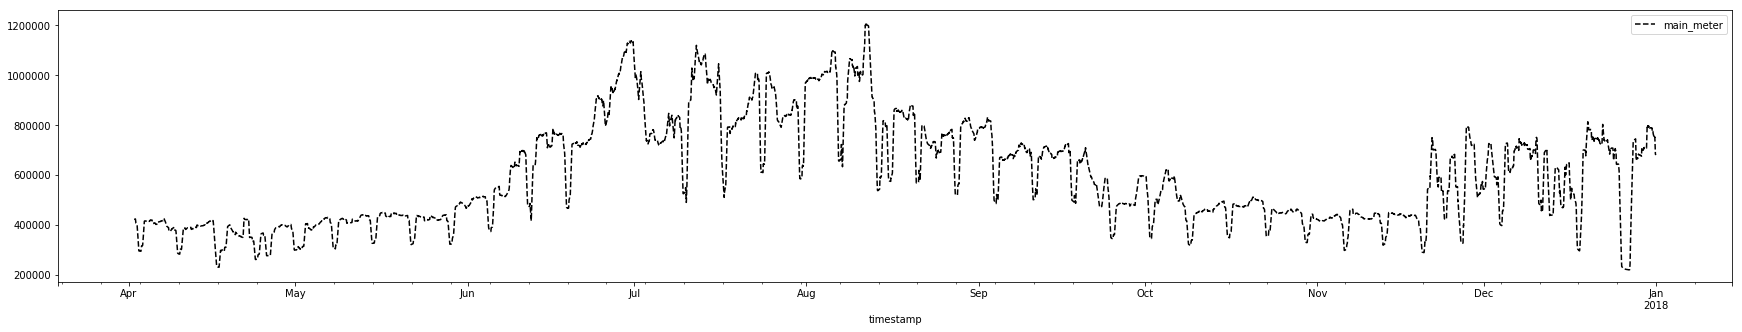

In [38]:
window = 96
building5[['timestamp', 'main_meter']].rolling(window, win_type=None, on='timestamp').sum().plot(x='timestamp', y='main_meter', figsize=(30, 5), style='k--')

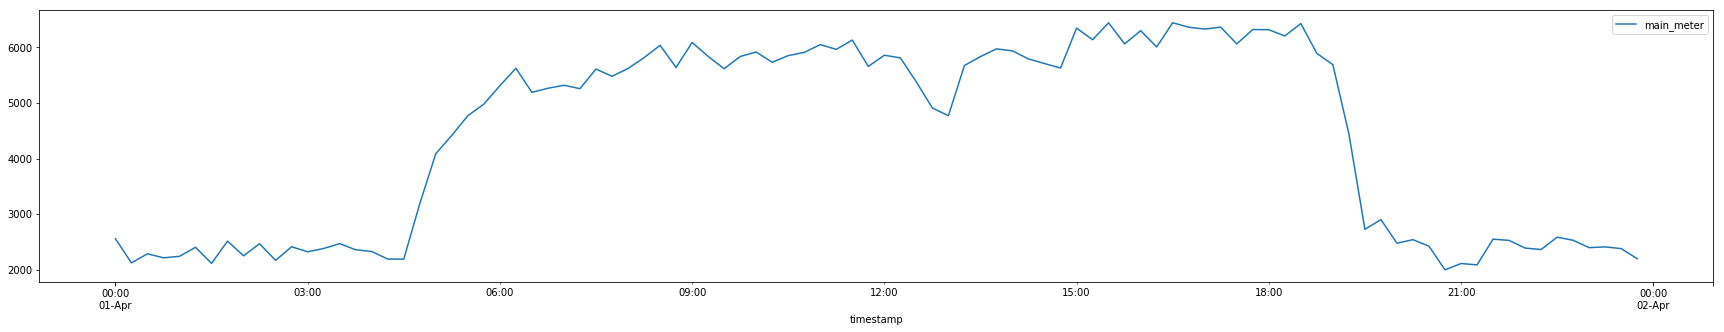

In [39]:
building5.iloc[:96].plot(x='timestamp', y='main_meter', figsize=(30, 5))

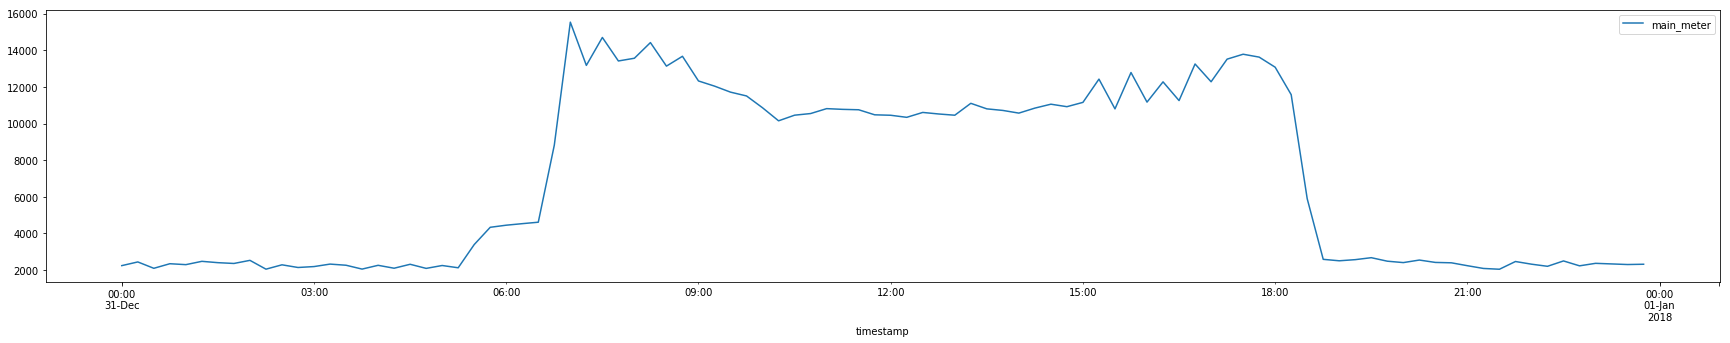

In [40]:
building5.iloc[-96:].plot(x='timestamp', y='main_meter', figsize=(30, 5))

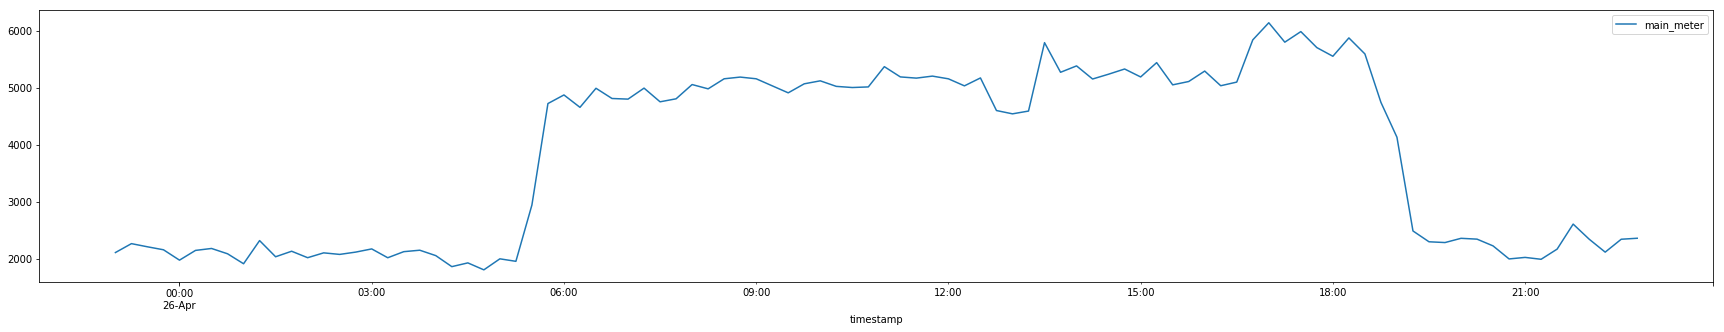

In [41]:
building5.iloc[2396:(2396+96)].plot(x='timestamp', y='main_meter', figsize=(30, 5))

In [42]:
day_wise_building5_main_meter = building5[['timestamp', 'main_meter']].rolling(window, win_type=None, on='timestamp').sum().iloc[95::96, :].reset_index(drop=True)
day_wise_building5_main_meter['timestamp'] = day_wise_building5_main_meter['timestamp'].apply(lambda x : x.date())
day_wise_building5_main_meter.head()

,timestamp,main_meter
0,2017-04-01,423270.054072
1,2017-04-02,295567.618082
2,2017-04-03,416070.404173
3,2017-04-04,418731.584651
4,2017-04-05,402932.479200


In [43]:
day_wise_building5_main_meter.shape

(275, 2)

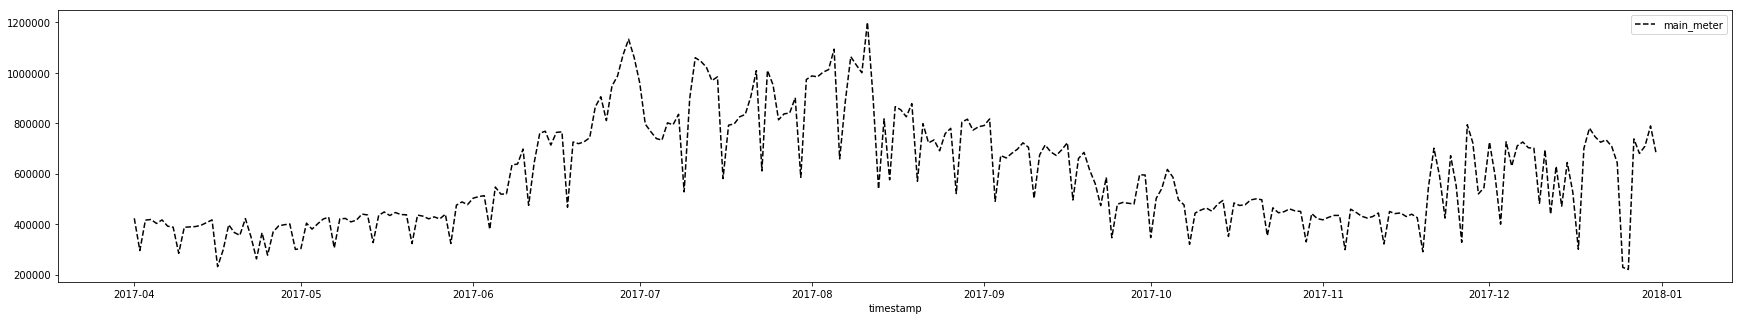

In [44]:
day_wise_building5_main_meter.plot(x='timestamp', y='main_meter', style='k--', figsize=(30, 5))

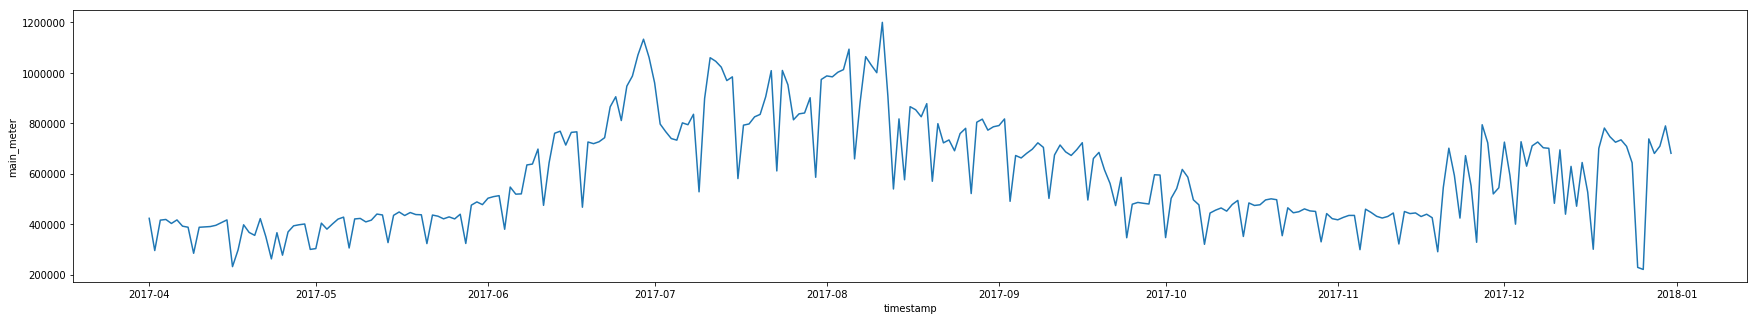

In [45]:
plt.figure(figsize=(30, 5))
sns.lineplot(data = day_wise_building5_main_meter, x='timestamp', y='main_meter')

### Adding all 96 data of a day as individual 96 columns

In [46]:
assert(np.array_equal(building5['main_meter'].values.reshape(-1, 96)[0], building5.loc[:95, 'main_meter'].values))

In [47]:
day_wise_building5_main_meter = pd.concat([day_wise_building5_main_meter, pd.DataFrame(building3['main_meter'].values.reshape(-1, 96))], axis=1)

NameError: name 'building3' is not defined

In [48]:
day_wise_building5_main_meter.head()

,timestamp,main_meter
0,2017-04-01,423270.054072
1,2017-04-02,295567.618082
2,2017-04-03,416070.404173
3,2017-04-04,418731.584651
4,2017-04-05,402932.479200


### Adding `is_weekend` column

In [49]:
day_wise_building5_main_meter.insert(1, 'is_weekend', day_wise_building5_main_meter['timestamp'].apply(lambda x : x.weekday()>=5).astype(int))
day_wise_building5_main_meter.head()

,timestamp,is_weekend,main_meter
0,2017-04-01,1,423270.054072
1,2017-04-02,1,295567.618082
2,2017-04-03,0,416070.404173
3,2017-04-04,0,418731.584651
4,2017-04-05,0,402932.479200


### Getting separate lineplot for weekend and weekday

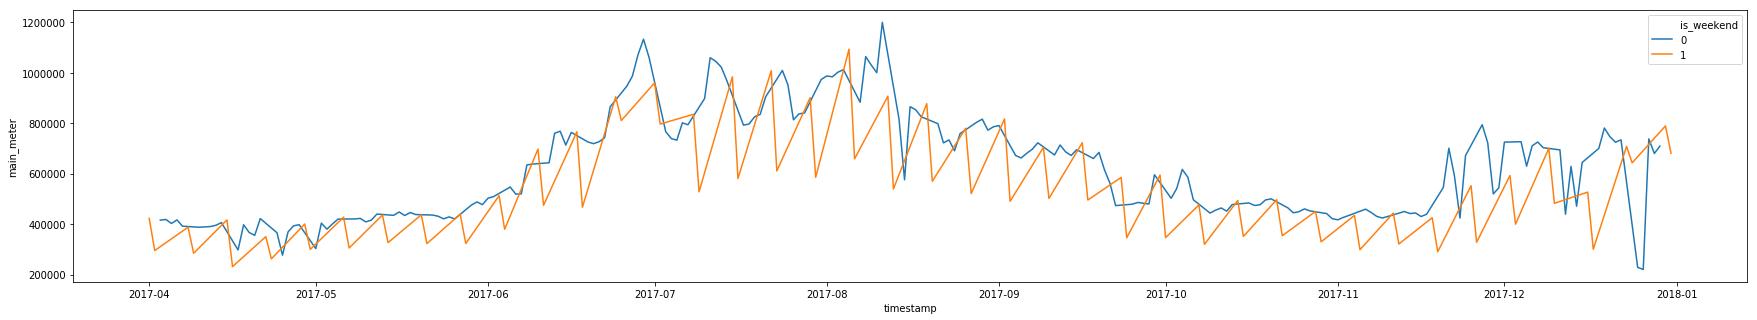

In [50]:
plt.figure(figsize=(30, 5))
ax = sns.lineplot(data = day_wise_building5_main_meter, x='timestamp', y='main_meter', hue='is_weekend')

(736420.0, 736694.0)

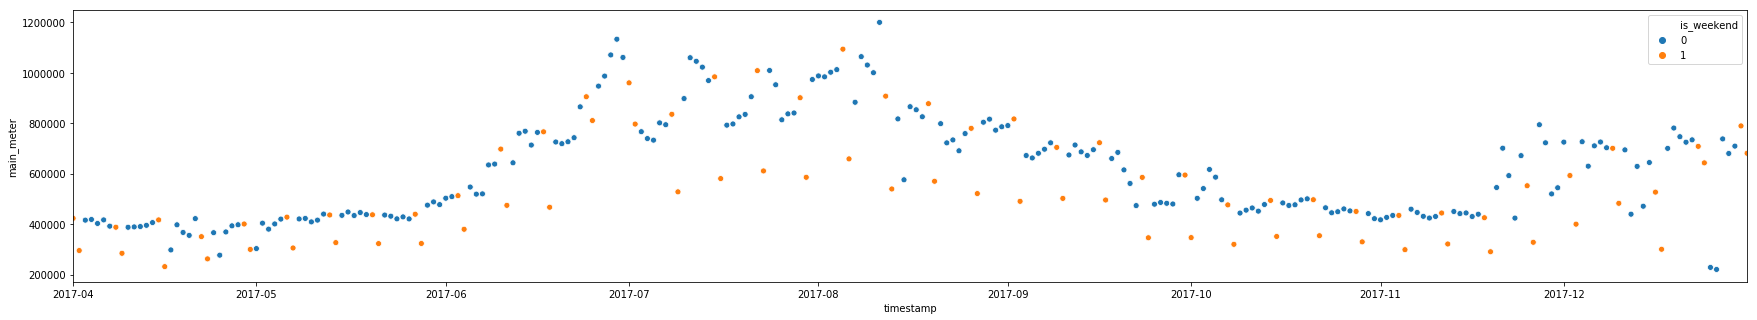

In [51]:
plt.figure(figsize=(30, 5))
ax = sns.scatterplot(data = day_wise_building5_main_meter, x='timestamp', y='main_meter', hue='is_weekend')
ax.set_xlim(day_wise_building5_main_meter['timestamp'].min(), day_wise_building5_main_meter['timestamp'].max())

In [52]:
day_wise_building5_main_meter.loc[day_wise_building5_main_meter.is_weekend == 1, 'main_meter'].sum()

42941829.574589856

In [53]:
day_wise_building5_main_meter.loc[day_wise_building5_main_meter.is_weekend == 0, 'main_meter'].sum()

120740667.58139715

In [54]:
def plot_custom_line_plots(data, col, label_column):
    """
    According to given labels column, change color of same line
    NOTE: For now considered label_column to be binary
    """
    
    cmap = ListedColormap(colors=['b', 'r'])
    norm = BoundaryNorm()
    
    points = data.loc[data[label_column] == 1, col].values
    segements = []

In [55]:
t = np.linspace(0, 10, 200)
x = np.cos(np.pi * t)
y = np.sin(t)

In [56]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

In [57]:
x.shape

(200,)

In [58]:
y.shape

(200,)

In [59]:
points[:5]

array([[[1.        , 0.        ]],

       [[0.98756455, 0.05023011]],

       [[0.95056749, 0.10033341]],

       [[0.88992896, 0.15018339]],

       [[0.8071571 , 0.19965422]]])

## FINDING SHARP CHANGE POINTS


(736619.0, 736627.0)

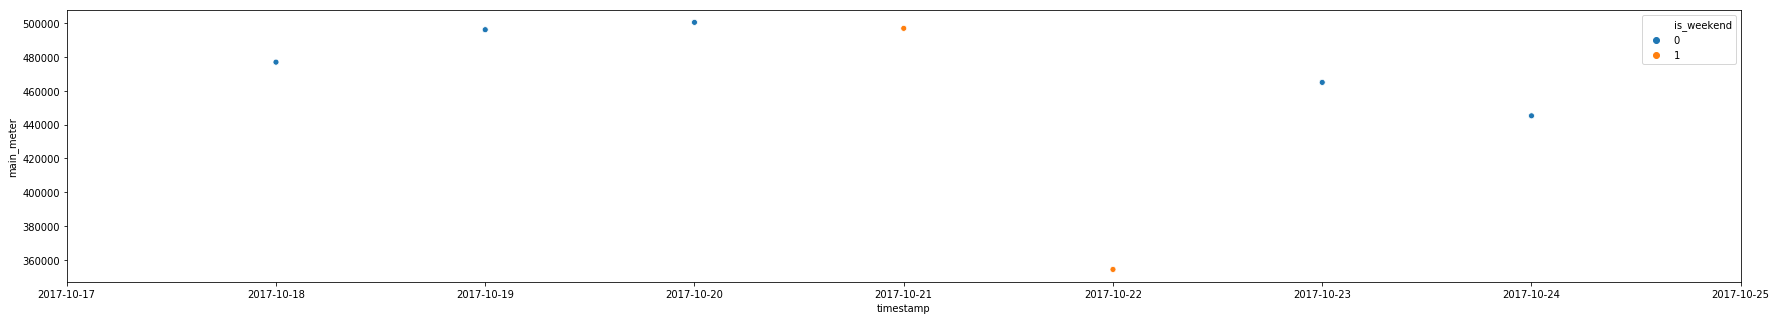

In [60]:
data = day_wise_building5_main_meter.iloc[200:207]

plt.figure(figsize=(30, 5))
ax = sns.scatterplot(data = data, x='timestamp', y='main_meter', hue='is_weekend')
ax.set_xlim(data['timestamp'].min() - timedelta(days=1), data['timestamp'].max() + timedelta(days=1))

(736549.0, 736563.0)

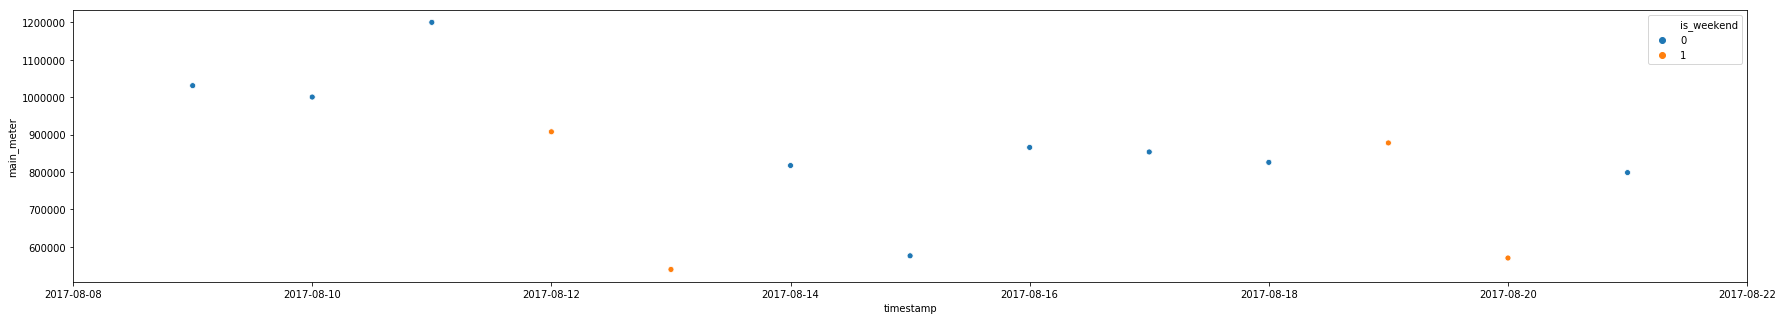

In [61]:
data = day_wise_building5_main_meter.iloc[130:143]

plt.figure(figsize=(30, 5))
ax = sns.scatterplot(data = data, x='timestamp', y='main_meter', hue='is_weekend')
ax.set_xlim(data['timestamp'].min() - timedelta(days=1), data['timestamp'].max() + timedelta(days=1))

In [62]:
day_wise_building5_main_meter.head()

,timestamp,is_weekend,main_meter
0,2017-04-01,1,423270.054072
1,2017-04-02,1,295567.618082
2,2017-04-03,0,416070.404173
3,2017-04-04,0,418731.584651
4,2017-04-05,0,402932.479200


### Inserting `main_meter_diff` as a column

In [81]:
main_meter_diff = day_wise_building5_main_meter['main_meter'] - day_wise_building5_main_meter['main_meter'].shift(periods=1)
day_wise_building5_main_meter.insert(3, 'main_meter_diff', main_meter_diff)
day_wise_building5_main_meter.head()

,timestamp,is_weekend,main_meter,main_meter_diff
0,2017-04-01,1,423270.054072,NaN
1,2017-04-02,1,295567.618082,-127702.435991
2,2017-04-03,0,416070.404173,120502.786091
3,2017-04-04,0,418731.584651,2661.180478
4,2017-04-05,0,402932.479200,-15799.105451


## FOR DECLINE POINTS

## TODO
- Find Suitable `value_for_decline`

In [82]:
def get_decline_dates(data, shift=1, value_for_decline=-500):
    timestamps_with_decline = data[(data['main_meter'] - data['main_meter'].shift(periods=shift)) <= value_for_decline].timestamp
    return timestamps_with_decline, timestamps_with_decline.apply(lambda data : data.weekday())

In [83]:
timestamps_with_decline, weekdays_with_decline = get_decline_dates(day_wise_building5_main_meter, shift=1, value_for_decline=-400)

In [84]:
timestamps_with_decline.shape

(126,)

In [85]:
weekdays_with_decline.value_counts()

6    40
2    21
1    18
5    17
3    17
4    11
0     2
Name: timestamp, dtype: int64

In [86]:
pd.set_option('display.max_rows', 70)

In [87]:
day_wise_building5_main_meter.iloc[-2:]

,timestamp,is_weekend,main_meter,main_meter_diff
273,2017-12-30,1,789722.236400,80140.621851
274,2017-12-31,1,681218.096568,-108504.139831


In [88]:
building5_decline_df = pd.concat([
                            timestamps_with_decline,
                            weekdays_with_decline,
                            day_wise_building5_main_meter.loc[timestamps_with_decline.index, 'main_meter_diff']], axis=1, ignore_index=True)
building5_decline_df.rename(columns = {0:'timestamp', 1:'weekday', 2:'main_meter_diff'}, inplace=True)
building5_decline_df.sort_values(by='timestamp', ascending=True)

,timestamp,weekday,main_meter_diff
1,2017-04-02,6,-127702.435991
4,2017-04-05,2,-15799.105451
6,2017-04-07,4,-24810.038097
7,2017-04-08,5,-4184.006483
8,2017-04-09,6,-103382.448373
15,2017-04-16,6,-185265.177475
18,2017-04-19,2,-30383.751823
19,2017-04-20,3,-11548.074153
21,2017-04-22,5,-71527.615441
22,2017-04-23,6,-88135.996125


In [89]:
print('Num of Sunday : ', (building5_decline_df.weekday == 6).sum())

Num of Sunday :  40


## All sundays except 31, but there is a decline about (-100) from 20 to 31

In [90]:
building5_decline_df[building5_decline_df.weekday != 6].sort_values(by='timestamp')

,timestamp,weekday,main_meter_diff
4,2017-04-05,2,-15799.105451
6,2017-04-07,4,-24810.038097
7,2017-04-08,5,-4184.006483
18,2017-04-19,2,-30383.751823
19,2017-04-20,3,-11548.074153
21,2017-04-22,5,-71527.615441
24,2017-04-25,1,-89153.109626
32,2017-05-03,2,-23730.585079
39,2017-05-10,2,-13776.438585
42,2017-05-13,5,-3644.752819


## Observations
- Will remove 26-12-2017 due to effects of Christmas
- Will remove 16-08-2017 due to effects of Independece Day

## Inference
- Will remove points below a threshold, like 1000

## FOR INCREMENT POINTS

## TODO
- Find Suitable `value_for_increase`

In [91]:
def get_increase_dates(data, shift=1, value_for_increase=500):
    timestamps_with_increase = data[(data['main_meter'] - data['main_meter'].shift(periods=shift)) >= value_for_increase].timestamp
    return timestamps_with_increase, timestamps_with_increase.apply(lambda data : data.weekday())

In [92]:
timestamps_with_increase, weekdays_with_increase = get_increase_dates(day_wise_building5_main_meter, shift=1, value_for_increase=400)

In [93]:
timestamps_with_increase.shape

(147,)

In [94]:
weekdays_with_increase.value_counts()

0    37
4    28
3    22
5    21
1    21
2    18
Name: timestamp, dtype: int64

In [95]:
pd.set_option('display.max_rows', 70)

In [96]:
building5_increase_df = pd.concat([
                            timestamps_with_increase,
                            weekdays_with_increase,
                            day_wise_building5_main_meter.loc[timestamps_with_increase.index, 'main_meter_diff']], axis=1, ignore_index=True)
building5_increase_df.rename(columns = {0:'timestamp', 1:'weekday', 2:'main_meter_diff'}, inplace=True)

In [97]:
print('Num of Monday : ', (building5_increase_df.weekday == 0).sum())

Num of Monday :  37


## All sundays except 31, but there is a decline about (-100) from 20 to 31

In [98]:
building5_increase_df[building5_increase_df.weekday != 0].sort_values(by='timestamp')

,timestamp,weekday,main_meter_diff
3,2017-04-04,1,2661.180478
5,2017-04-06,3,14074.636734
10,2017-04-11,1,1415.350695
11,2017-04-12,2,1429.436612
12,2017-04-13,3,4914.070273
13,2017-04-14,4,10834.331415
14,2017-04-15,5,10604.965988
17,2017-04-18,1,99670.488291
20,2017-04-21,4,66451.546292
25,2017-04-26,2,92124.792406


## Observations

## Inference
